<a href="https://colab.research.google.com/github/XavierCarrera/Tutorial-Machine-Learning-Clasificacion-Lineal/blob/main/3_Analisis_Discriminante_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

Como vimos en el apunte pasado, la clasificación logística nos sirve para para clasificar uno a uno los tipos de flores. Sin embargo, podemos utilizar algoritmos cono el análisis discriminante lineal para clasificar de un solo golpe todas nuestras flores.

In [8]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

Para este caso en particular, no utilizaremos la matriz de indicadores para dividir las especies de plantas. Aunque no hay una relación ordinal entre ellas (como ya habíamos discutido antes), utilizaremos etiquetas de 0 a 2 para facilitar el trabajo del algoritmo de *Linear Discriminant Analysis* de *Scikit-Learn*. Para eso usamos el módulo *LabelEncoder*.

In [2]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Exploración de Datos

Antes de seguir, veamos como se ven nuestros datos en un plano bidimensional. En este, trataremos de ubicar categorias al analizar el tamaño de los sépalos y luego el de los pétalos.

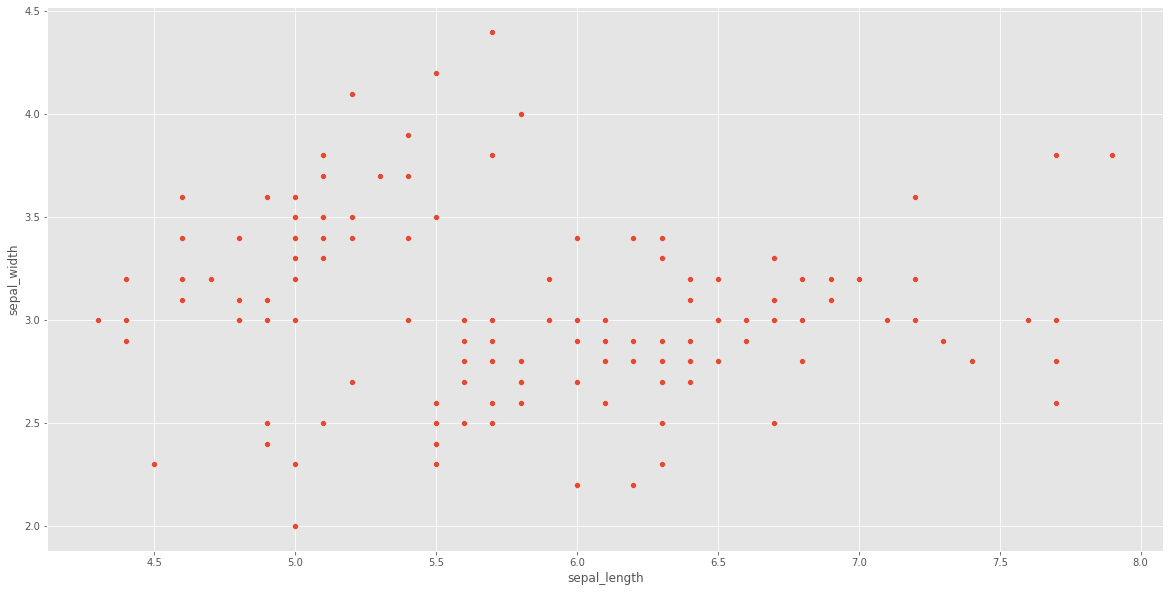

In [ ]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width")

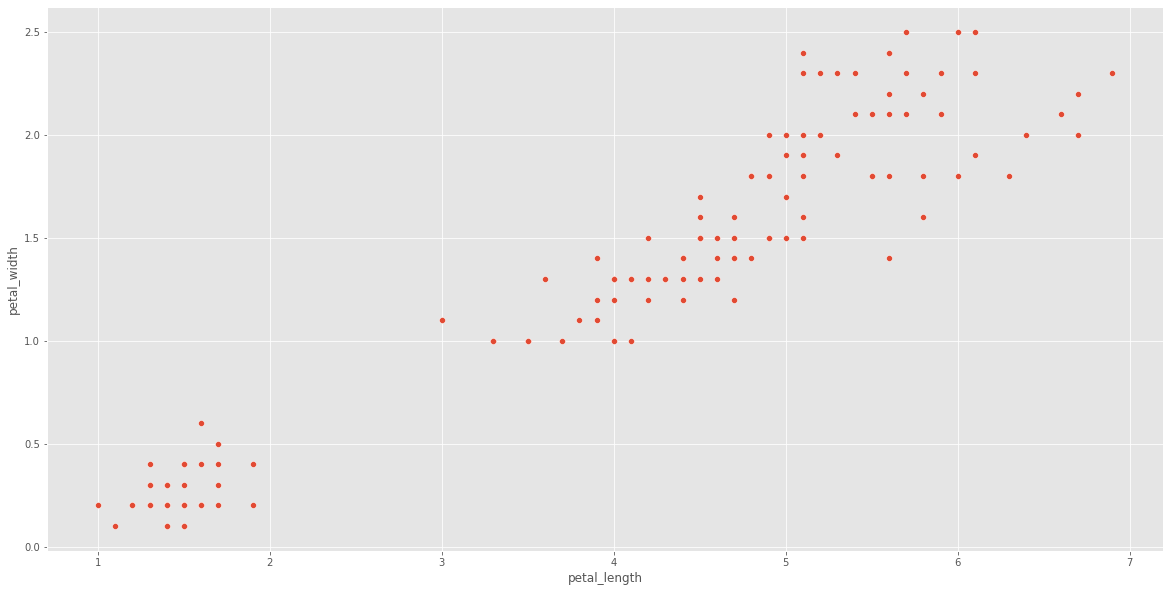

In [ ]:
sns.scatterplot(data=df, x="petal_length", y="petal_width")

Como podemos ver, al analizar el tamaño de los pétalos podemos crear categorias lineales más claras. Es decir, podemos ubicar espacialmente diferentes de cateogrias. 

# Análisis de Discriminación Lineal

Dado el descubrimiento anterior, usaremos los datos de tamaño de pétalos para entrenar un pequeño modelo de análisis de discriminación lineal.

In [4]:
X = df[["petal_length", "petal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [5]:
clf = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Como podemos ver, en Anális de Discriminación Lineal es muy poderoso ya que nos ayudó a acertar en un 100% de los casos si la flor pertenecía a una categoría o la otra.

Aunque como siempre, debemos ser escépticos de tales niveles de precisión ya que podríamos estar cayendo en [overfitting](https://es.wikipedia.org/wiki/Sobreajuste).

Finalmente, podemos visualizar nuestros resultados graficando con el plano anterior. Como podemos ver, esta herramienta ha encontrado el punto de quiebre que clasifica a cada tipo de flor. 

Text(0, 0.5, 'Anchura del Pétalo')

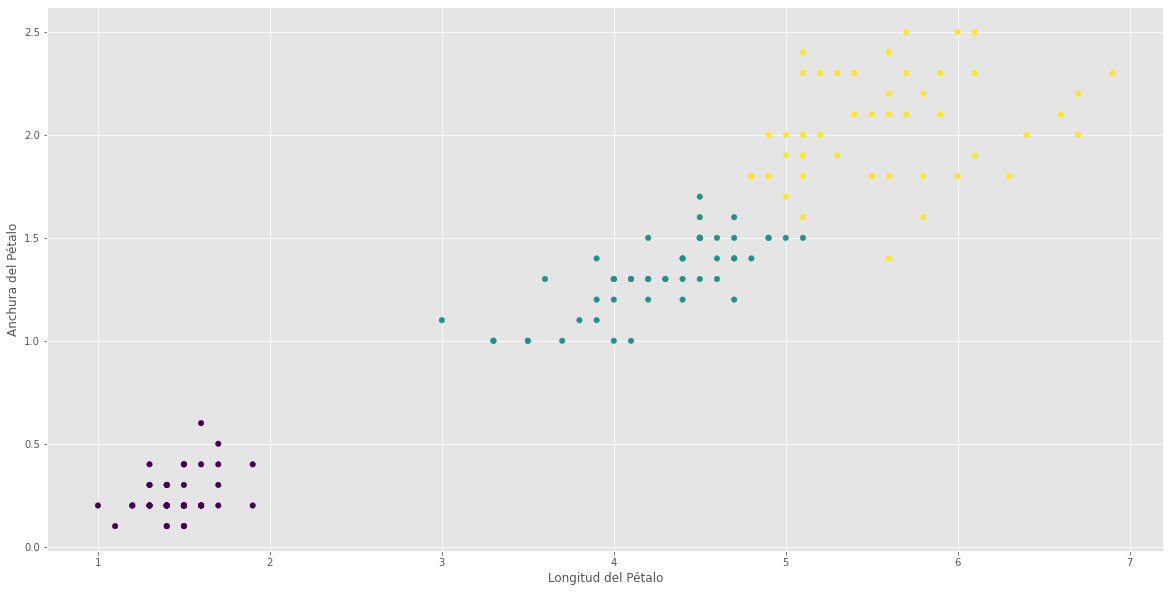

In [11]:
y_labels = clf.predict(X)
plt.scatter(df["petal_length"], df["petal_width"], c = y_labels, s = 30)
plt.xlabel("Longitud del Pétalo")
plt.ylabel("Anchura del Pétalo")